In [1]:
import sarddpm_train
from matplotlib import pyplot as plt
import torch
import guideddiffusion.gaussian_diffusion as gd
import guideddiffusion.script_util as su
import numpy as np
import valdata


In [2]:
import cv2

In [3]:
dl = torch.utils.data.DataLoader(valdata.ValDataNew(dataset_path="../DSIFN/val/t1"),
                                 batch_size=1, shuffle=False, num_workers=1) 




In [4]:
for batch_id1, data_var in enumerate(dl):
    clean_batch, model_kwargs = data_var

    speck = model_kwargs['SR']
    speck = ((speck + 1) * 127.5)
    speck = speck.clamp(0, 255).to(torch.uint8)
    speck = speck.permute(0, 2, 3, 1)
    speck = speck.contiguous().cpu().numpy()[0]
    print(speck.shape)
    cv2.imwrite("speckled.png", speck)
    break

(256, 256, 3)


In [5]:
g = sarddpm_train.load_sar_data("../DSIFN/train/","../DSIFN/train/", 4, 256, 256, False)




In [6]:
batch = next(g)

In [7]:
speck = batch[1]["SR"][1].transpose(0,2)
imCR = batch[1]["HR"][1].transpose(0,2)

In [8]:
m, M = torch.min(speck).item(), torch.max(speck).item()
m,M

(1.7660534381866455, 5.968825817108154)

In [9]:
noise = np.array(speck-imCR)


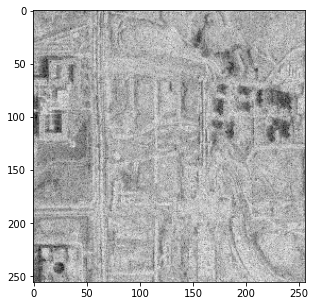

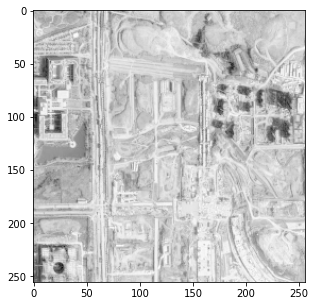

In [10]:
plt.figure(figsize = (5,5))
plt.imshow((speck - torch.min(speck))/(torch.max(speck)-torch.min(speck)) )
plt.show()
plt.figure(figsize = (5,5))
plt.imshow((imCR - torch.min(imCR))/(torch.max(imCR)-torch.min(imCR)) )


In [11]:
noise = np.array(speck-imCR)
print(noise.mean(), noise.std())

-0.14840928 0.27639303


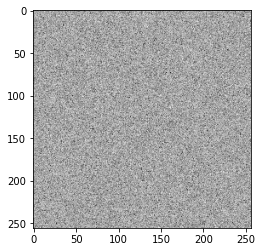

In [12]:
plt.imshow((noise-np.min(noise))/(np.max(noise)-np.min(noise)))

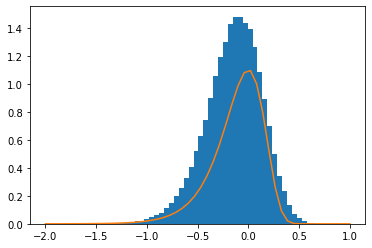

In [13]:
plt.hist(noise.ravel(), bins = 50, density = True)
x = np.linspace(-2,1, 50)
paramX = x*5
plt.plot(x,np.exp(paramX-np.exp(paramX))*3)


In [14]:
myGD = su.create_gaussian_diffusion()

In [15]:
device = torch.device("cpu")

In [16]:
diffused = myGD.q_sample(imCR, torch.tensor(200).to(device))

In [17]:
m,M = torch.min(diffused), torch.max(diffused)

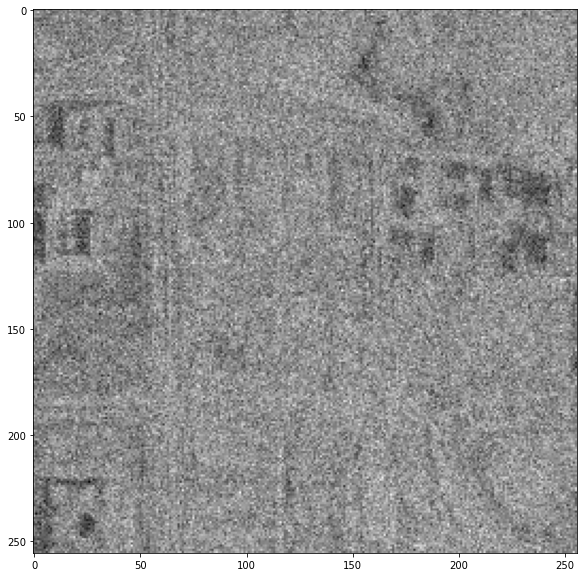

In [18]:
plt.figure(figsize = (10,10))
plt.imshow((diffused-m)/(M-m))

In [19]:
diffNp = diffused[:,:,0].ravel().numpy()

In [20]:
noise =diffNp-imCR.ravel().numpy()[::3]

''

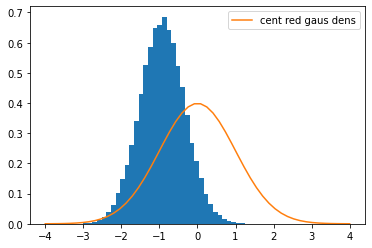

In [21]:
plt.hist(noise,bins =  40, density = True)
x = np.linspace(-4,4, 50)
plt.plot(x,1/(2*np.pi)**.5*np.exp(-x**2/2), label="cent red gaus dens")
plt.legend()
""

In [22]:
noise.mean()

-0.92645913

In [23]:
diffNp.mean()

3.7823505

In [24]:
seed = np.random.RandomState(112311)

''

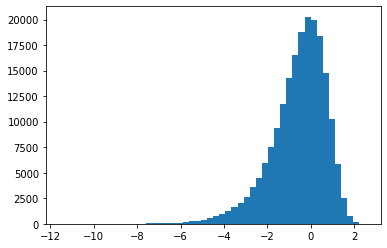

In [25]:
plt.hist(np.log(seed.gamma(1,1,diffused.shape).ravel()), bins = 50)
""


In [26]:
speck[175:220,225:].shape

torch.Size([45, 31, 3])

In [27]:
homoRegion = np.array(speck[175:220,225:])

In [28]:
len(homoRegion[:,:,0].ravel())

1395